In [1]:
import pandas as pd
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

gauth = GoogleAuth()

# 설정파일 경로를 명시적으로 지정
gauth.LoadClientConfigFile('/Users/jangsunho/Desktop/test/config/client_secret.json')

# 웹 브라우저를 통한 인증
gauth.LocalWebserverAuth()

# Drive 객체 생성
drive = GoogleDrive(gauth)




Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?client_id=478238330564-6pivnad3btouph2g4dqmoehjm0bqon9m.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&access_type=offline&response_type=code

Authentication successful.


In [2]:
folder_id = '1mDjIEaO1jnODM_rOl_5DaIPjdJGPxCuG'
file_list = drive.ListFile({
    'q': f"'{folder_id}' in parents and trashed=false"
}).GetList()

# 결과 출력
for file in file_list:
    print(f"title: {file['title']}, id: {file['id']}, mimeType: {file['mimeType']}")


title: korea-wine.csv, id: 1KgQzgNAoyeEy79vb1JTRlTGIPilr-L7F, mimeType: text/csv
title: china_summary.xlsx, id: 1NdkatmCsVhJck2TLcurJ_FGKSN_6xi4o, mimeType: application/vnd.openxmlformats-officedocument.spreadsheetml.sheet
title: fruit_data_csv.csv, id: 1yxpfdnPpw_1Sart0dHNIwx1ItRcBBehZ, mimeType: text/csv
title: auto_test_data_csv.csv, id: 10bz79BVuQYo4cvHGf2yIbdoyUffMFczR, mimeType: text/csv
title: oil_margin_csv.csv, id: 15H25V9JIBQcPhf8RdL2nfG5oO2FVVDtq, mimeType: text/csv
title: 회귀분석_강의교안_2차 배포본(PDF).pdf, id: 1w0db0akMGAhL0piH26XC4FIXz98qd4_S, mimeType: application/pdf
title: 회귀분석_강의교안_1차 배포본(PDF), id: 1gw-RlyLREgsby9N1eSE8c7vhKHz11fUd2nyXOFXT6Ic, mimeType: application/vnd.google-apps.document
title: dementia_csv.csv, id: 1AFQjCbx2zf_ubqs5HVELpe4EQ3JUTx0E, mimeType: text/csv
title: 회귀분석_강의교안_1차 배포본(PDF).pdf, id: 11F4OLPyFXpJGr66u3KWGyNr4kaXOPn4_, mimeType: application/pdf


In [3]:
# 파일 ID 및 파일명 지정
file_id = '10bz79BVuQYo4cvHGf2yIbdoyUffMFczR'
file_name = 'auto_test_data_csv.csv'

# 파일 객체 생성 후 다운로드
file = drive.CreateFile({'id': file_id})
file.GetContentFile(file_name)

# pandas로 엑셀 파일 읽기
df = pd.read_csv(file_name)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fuel_efficiency   30 non-null     float64
 1   displacement      30 non-null     float64
 2   power             30 non-null     int64  
 3   trinsmission      30 non-null     int64  
 4   length            30 non-null     float64
 5   width             30 non-null     float64
 6   car_weight        30 non-null     int64  
 7   trinmission_type  30 non-null     int64  
dtypes: float64(4), int64(4)
memory usage: 2.0 KB


array([[<Axes: xlabel='fuel_efficiency', ylabel='fuel_efficiency'>,
        <Axes: xlabel='displacement', ylabel='fuel_efficiency'>,
        <Axes: xlabel='power', ylabel='fuel_efficiency'>,
        <Axes: xlabel='trinsmission', ylabel='fuel_efficiency'>,
        <Axes: xlabel='length', ylabel='fuel_efficiency'>,
        <Axes: xlabel='width', ylabel='fuel_efficiency'>,
        <Axes: xlabel='car_weight', ylabel='fuel_efficiency'>,
        <Axes: xlabel='trinmission_type', ylabel='fuel_efficiency'>],
       [<Axes: xlabel='fuel_efficiency', ylabel='displacement'>,
        <Axes: xlabel='displacement', ylabel='displacement'>,
        <Axes: xlabel='power', ylabel='displacement'>,
        <Axes: xlabel='trinsmission', ylabel='displacement'>,
        <Axes: xlabel='length', ylabel='displacement'>,
        <Axes: xlabel='width', ylabel='displacement'>,
        <Axes: xlabel='car_weight', ylabel='displacement'>,
        <Axes: xlabel='trinmission_type', ylabel='displacement'>],
       [<Axe

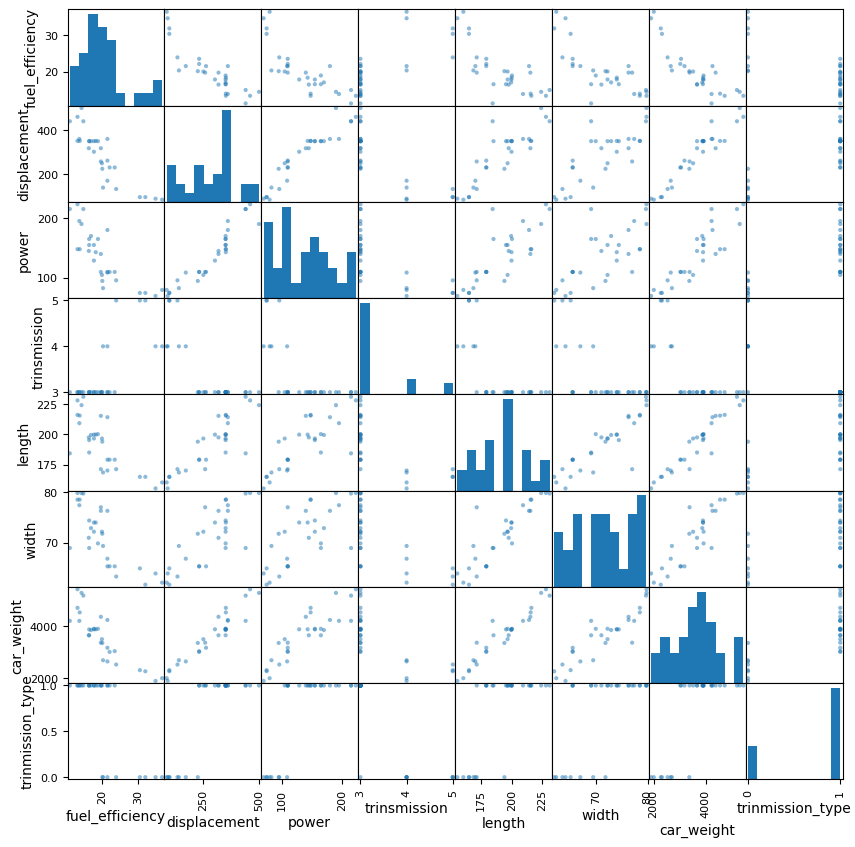

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(10, 10))

In [15]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula as smf
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [11]:
X = df.drop(columns=['fuel_efficiency'])
y = df['fuel_efficiency']

# 1. 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=7)
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7'])

print(pca.components_.shape)
print(pca.components_)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

(7, 7)
[[ 0.40571128  0.37500125 -0.34353982  0.38598003  0.36798184  0.40635703
   0.35670092]
 [ 0.00743341  0.16690413  0.61853967  0.33067271  0.32771462  0.2424712
  -0.56032386]
 [ 0.31108976  0.65621176  0.30703451 -0.21245451 -0.57209437 -0.0041189
   0.07676742]
 [-0.12991075 -0.27131004  0.583713    0.24942346 -0.06729526  0.07954153
   0.70407785]
 [-0.06871848 -0.15486588 -0.22438858  0.69470623 -0.62147015  0.1033749
  -0.20350879]
 [ 0.61948532 -0.53690117  0.07671587 -0.27640551 -0.1551259   0.45404018
  -0.12439135]
 [-0.57723926  0.12266925 -0.09034629 -0.27442528 -0.12281154  0.74357179
   0.01713838]]
[0.82153872 0.08834209 0.05015175 0.01942397 0.01418899 0.00514174
 0.00121273]
[13.13480611  4.3071846   3.2452839   2.01966167  1.72617734  1.03911796
  0.50465245]


In [12]:
df1= pd.concat([principalDf, df[['fuel_efficiency']]], axis =1)
y_pca = df1[['fuel_efficiency']]
x_pca = df1.loc[df1.index, ['principal component 1']]
xc_pca = sm.add_constant(x_pca)
results_pca = sm.OLS(y_pca,xc_pca).fit()
print(results_pca.summary())

                            OLS Regression Results                            
Dep. Variable:        fuel_efficiency   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     81.99
Date:                Sun, 15 Jun 2025   Prob (F-statistic):           8.22e-10
Time:                        22:22:43   Log-Likelihood:                -76.576
No. Observations:                  30   AIC:                             157.2
Df Residuals:                      28   BIC:                             160.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    20.04

In [13]:
#주성분 계수 (PC1 방향 벡터)
pc1_vector = pca.components_[0]  # shape: (7,)

# 예측에 사용할 입력값
x_input = np.array([310, 180, 5, 230, 70, 3120, 1])

# 입력값 표준화 (★ 중요: 같은 scaler 사용)
x_scaled = scaler.transform([x_input])  # shape: (1, 7)

# PC1 계산
PC1 = np.dot(pc1_vector, x_scaled[0])

# 회귀 계수 (PC1 기반 예측식)
intercept = 20.0433
coef_PC1 = -2.2169

# 9. 예측값 계산
fuel_efficiency_pred = intercept + coef_PC1 * PC1

# 10. 결과 출력
print(f"표준화된 입력값: {x_scaled[0]}")
print(f"PC1: {PC1:.4f}")
print(f"예측 연비 (fuel_efficiency): {fuel_efficiency_pred:.4f}")

표준화된 입력값: [ 0.21288862  0.98025251  2.56494588  1.8213018  -0.254342   -0.54672097
  0.60302269]
PC1: 0.1751
예측 연비 (fuel_efficiency): 19.6550


/opt/anaconda3/envs/test/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


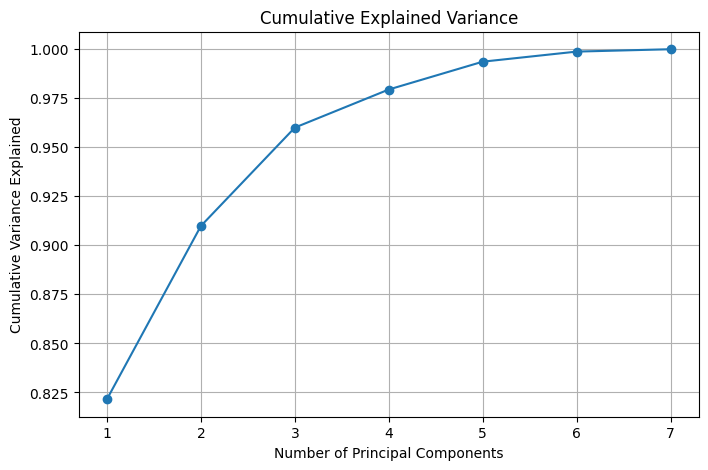

In [14]:
explained_variance = pca.explained_variance_ratio_
x = np.arange(1, len(explained_variance) + 1)

plt.figure(figsize=(8, 5))
plt.plot(x, np.cumsum(explained_variance), marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.xticks(x)
plt.grid(True)

Text(0.5, 1.0, '잔차 vs 예측값 (등분산성)')

/opt/anaconda3/envs/test/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51092 (\N{HANGUL SYLLABLE JAN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/anaconda3/envs/test/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/anaconda3/envs/test/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/anaconda3/envs/test/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/anaconda3/envs/test/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/anaconda3/envs/test/lib/python3.10/site-packa

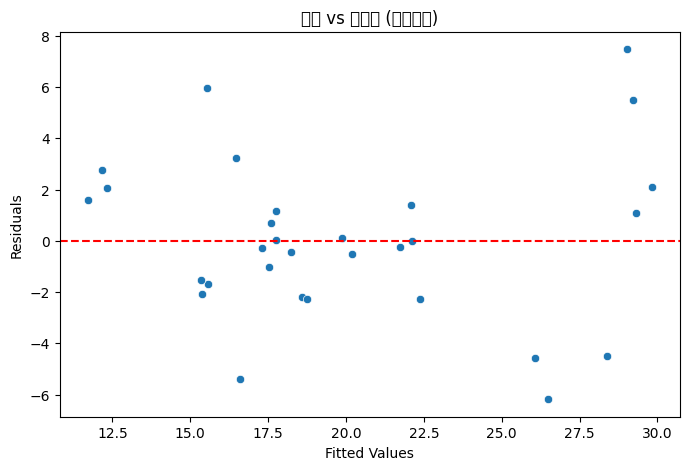

In [18]:
fitted_values = results_pca.fittedvalues       # 예측값
residuals = results_pca.resid                  # 잔차 (실제 - 예측)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("잔차 vs 예측값 (등분산성)")

/opt/anaconda3/envs/test/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/test/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44508 (\N{HANGUL SYLLABLE GYU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/test/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/test/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


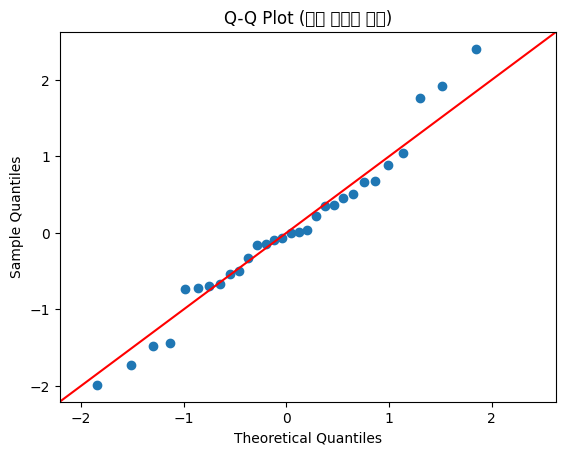

In [23]:
sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot (잔차 정규성 진단)")
plt.show()

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_df = pd.DataFrame()
vif_df["feature"] = xc_pca.columns
vif_df["VIF"] = [variance_inflation_factor(xc_pca.values, i) for i in range(xc_pca.shape[1])]

print(vif_df)

                 feature  VIF
0                  const  1.0
1  principal component 1  1.0
